In [37]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
#Importing required dataset
city_master = pd.read_csv('City_Master.csv')
cust_and_bank_det = pd.read_csv('Customer_and_bank details_p1.csv')
cust_camp_det = pd.read_csv('Customer_campaign_details_p1.csv')
cust_post_code_det = pd.read_csv('Customer_Postal_Code_details.csv')
cust_resp_data = pd.read_csv('Customer_Response_data_p1.csv')
cust_social_eco_data = pd.read_csv('Customer_social_economic_data_p1.csv')
reg_code_master = pd.read_csv('Region_code_master.csv')
state_master = pd.read_csv('State_Master.csv')

In [4]:
#Perform Task 1.1 i.e. join customer response data with customer campaign data
df1 = pd.merge(cust_resp_data, cust_camp_det, on='Customer_id', how='outer')

In [5]:
#Display the joined dataset
print(df1)

       Customer_id    y    contact month day_of_week  duration  campaign  \
0                1   no  telephone   may         mon       307         1   
1                2   no  telephone   may         mon       198         1   
2                3   no  telephone   may         mon       139         1   
3                4   no  telephone   may         mon       217         1   
4                5   no  telephone   may         mon       380         1   
...            ...  ...        ...   ...         ...       ...       ...   
37079        37080  yes   cellular   nov         fri       334         1   
37080        37081   no   cellular   nov         fri       383         1   
37081        37082   no   cellular   nov         fri       189         2   
37082        37083  yes   cellular   nov         fri       442         1   
37083        37084   no   cellular   nov         fri       239         3   

       pdays  previous     poutcome  
0        999         0  nonexistent  
1        99

<AxesSubplot:title={'center':'Customer Response'}>

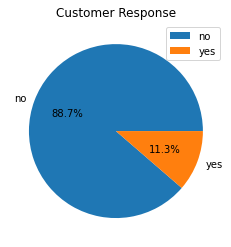

In [75]:
#Visualising the response of the customers using pie chart
response = df1['y'].value_counts()
display(response.plot.pie(y='y', autopct='%1.1f%%', label="", title="Customer Response", legend=True))

<AxesSubplot:>

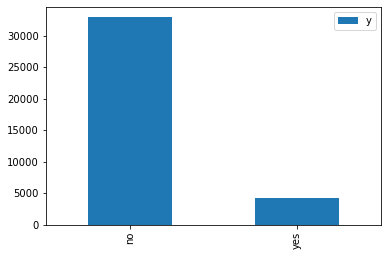

In [78]:
#Visualising the response of the customers using bar chart
display(response.plot.bar(y='y', legend=True))

cellular     23522
telephone    13562
Name: contact, dtype: int64


<AxesSubplot:title={'center':'Mode of Contact'}, ylabel='contact'>

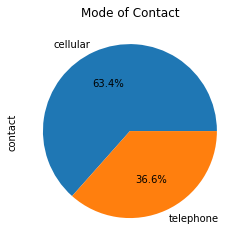

In [81]:
#visualising the mode of contacting the customers [cellular vs telephone]
resp_contact = df1['contact'].value_counts()
print(resp_contact)
display(resp_contact.plot.pie(autopct='%1.1f%%', title="Mode of Contact"))

In [ ]:
tel_yes = df1[["contact", "y"]].loc[(df1["contact"] == "telephone") & (df1["y"]=="yes")]

In [38]:
tel_no = df1[["contact", "y"]].loc[(df1["contact"] == "telephone") & (df1["y"]=="no")]

In [46]:
tel =  df1[["contact", "y"]].loc[(df1["contact"] == "telephone")]

<AxesSubplot:ylabel='None'>

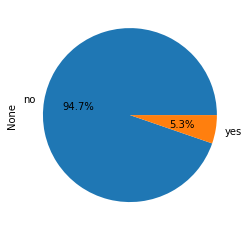

In [64]:
tel.groupby('y').size().plot.pie(autopct='%1.1f%%')

In [62]:
cellular =  df1[["contact", "y"]].loc[(df1["contact"] == "cellular")]

<AxesSubplot:ylabel='None'>

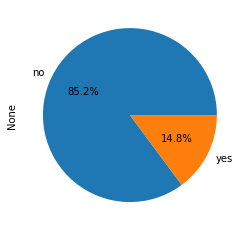

In [88]:
cellular.groupby('y').size().plot.pie(autopct='%1.1f%%')

In [85]:
df_telephone = df1.groupby('contact').sum()

In [87]:
display(df_telephone)

,Customer_id,duration,campaign,pdays,previous
contact,,,,,
cellular,565397257,6193253,56745,22241361,5955
telephone,122232813,3383243,38544,13453133,460
